In [1]:
%matplotlib inline

seed_value = 100
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Data uploading

In [2]:
AIRPORT_ICAO = "ESSA"

CLUSTERS = [1,2,3,4,5,6]

DATA_DIR = os.path.join("..", "..")
DATA_DIR = os.path.join(DATA_DIR, "..")
DATA_DIR = os.path.join(DATA_DIR, "data")
DATA_DIR = os.path.join(DATA_DIR, "Regression")

# WIF
rwy_metrics_WIF_vertical_PIs_by_hour_df_list = [] # list

# TIF
rwy_metrics_TIF_vertical_PIs_by_hour_df_list = [] # list

for cluster in CLUSTERS:
    filename = AIRPORT_ICAO + "_metrics_WIF_vertical_PIs_by_hour_cluster" + str(cluster) + ".csv"
    full_filename = os.path.join(DATA_DIR, filename)
    temp_df = pd.read_csv(full_filename, sep=' ')
    rwy_metrics_WIF_vertical_PIs_by_hour_df_list.append(temp_df)

    filename = AIRPORT_ICAO + "_metrics_TIF_vertical_PIs_by_hour_cluster" + str(cluster) + ".csv"
    full_filename = os.path.join(DATA_DIR, filename)
    temp_df = pd.read_csv(full_filename, sep=' ')
    rwy_metrics_TIF_vertical_PIs_by_hour_df_list.append(temp_df)

# Average Time On Levels

## Medians of Average Time On Levels vs WIF

0.58
0.42
0.50
0.56
0.68
0.64


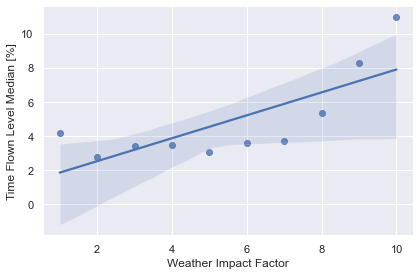

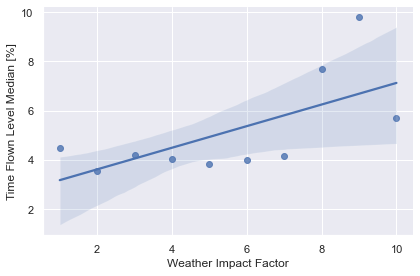

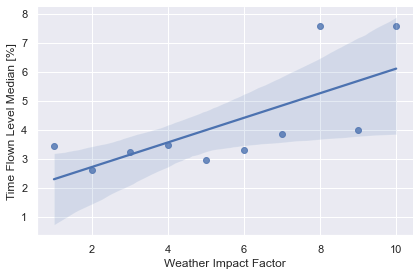

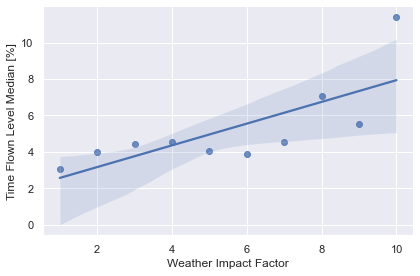

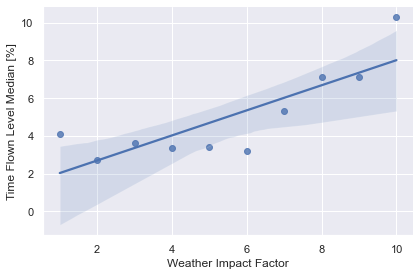

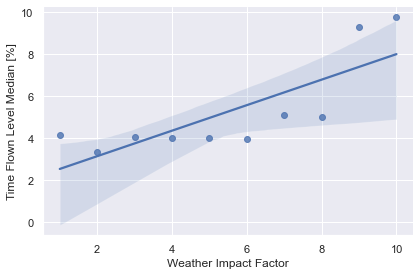

In [4]:
for cluster in CLUSTERS:
    df = rwy_metrics_WIF_vertical_PIs_by_hour_df_list[cluster-1].copy()

    df = df[df['numberOfFlights']>0]
    
    df.set_index(['WIF'], inplace=True)
    df.sort_index(inplace=True)

    median_df = pd.DataFrame(columns=['WIF', 'timeOnLevelsMedian'])

    for idx, group in df.groupby(level='WIF'):
    
        idx_df = group['timeOnLevelsPercentMean']
        #idx_df = group['timeOnLevelsMean']
    
        idx_median = np.median(idx_df)
        median_df = median_df.append({'WIF': idx, 'timeOnLevelsMedian': idx_median}, ignore_index=True)

    median_df['WIF'] = median_df['WIF'].astype(np.float)
    median_df['timeOnLevelsMedian'] = median_df['timeOnLevelsMedian'].astype(np.float)
        
    sns.set(rc={'figure.figsize':(1,1)})

    sns.lmplot(x='WIF',y='timeOnLevelsMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
    plt.xlabel('Weather Impact Factor')
    #plt.ylabel('Time Flown Level Median [min]')
    plt.ylabel('Time Flown Level Median [%]')
        
    fig_name = "Figures\TimeOnLevelsPercentVsWIFOnlyClusters\TimeOnLevelsPercentVsWIF_cluster" + str(cluster) + ".png"
    #fig_name = "Figures\TimeOnLevelsVsWIFOnlyClusters\TimeOnLevelsVsWIF_cluster" + str(cluster) + ".png"
    plt.savefig(fig_name)

    #statsmodel:
    X_df = median_df[['WIF']]
    y_df = median_df[['timeOnLevelsMedian']]

    X2 = sm.add_constant(X_df.values)
    est = sm.OLS(y_df, X2)
    est2 = est.fit()
    #print(est2.summary())
    rsquare = est2.rsquared
    #print(f"R-suare is {rsquare:.2f}")
    print(f"{rsquare:.2f}")
    # with outliers - ESGG: 0.57 ESSA: 0.76
    # without outliers - ESGG: 0.93 ESSA: 0.73